In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.fashion_mnist

In [3]:
(training_image, training_labels), (test_image, test_labels)=mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

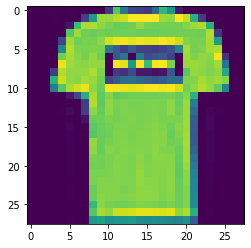

In [5]:
plt.imshow(training_image[1])

In [6]:
print(training_labels[1])

0


# labels represent to

In [7]:
print(training_image[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [8]:
training_labels.size

60000

In [9]:
training_image=training_image.reshape(60000,28,28,1)
training_image=training_image/255.0
test_image=test_image.reshape(10000,28,28,1)
test_image=test_image/255.0

# CNN MoDEL

In [37]:
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [40]:
model.fit(training_image, training_labels, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.4373 - acc: 0.8420
Epoch 2/6
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.2927 - acc: 0.8926
Epoch 3/6
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.2461 - acc: 0.9082
Epoch 4/6
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.2124 - acc: 0.9201
Epoch 5/6
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.1873 - acc: 0.9303
Epoch 6/6
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.1618 - acc: 0.9391


In [41]:
test_loss=model.evaluate(test_image, test_labels)

10000/10000 [==============================] - 8s 796us/sample - loss: 0.2440 - acc: 0.9150


# #visualizing the convolution and pooling

In [42]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


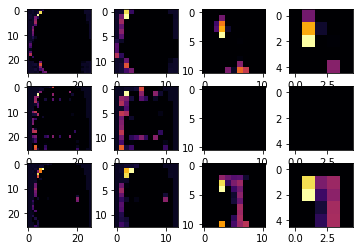

In [54]:
import matplotlib.pyplot as plt
f, axarr=plt.subplots(3,4)
first_image=4
second_image=7
third_image=26
convolution_number=1
from tensorflow.keras import models
layer_outputs=[layer.output for layer in model.layers]
activation_mode=tf.keras.models.Model(inputs=model.input, outputs = layer_outputs)
activation_mode=tf.keras.models.Model(inputs=model.input, outputs = layer_outputs)
for x in range(0,4):
    f1=activation_mode.predict(test_image[first_image].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, : ,:, convolution_number], cmap='inferno')
    axarr[0,x].grid(False)
    f2=activation_mode.predict(test_image[second_image].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,: ,:, convolution_number], cmap='inferno')
    axarr[1,x].grid(False)
    f3=activation_mode.predict(test_image[third_image].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0,: ,:, convolution_number], cmap='inferno')
    axarr[2,x].grid(False)

In [ ]:
mode